In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext


        
spark = SparkSession \
        .builder \
        .appName("Test Spark") \
        .config("spark.jars", "/opt/postgresql-42.4.0.jar") \
        .config("spark.executor.memory", "20g") \
        .master("spark://131.225.58.251:7077") \
        .getOrCreate() \



#spark.conf.set("spark.executor.memory", "20g")
#spark.conf.set("spark.executor.cores", "8")





22/07/26 12:30:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [2]:
df = spark.read \
     .format("jdbc") \
     .option("url", "jdbc:postgresql://fndca5b:5432/billing") \
     .option("dbtable", "(select *,  split_part(storageclass, '.', 1) as vo , date_trunc('hour', datestamp) as date from billinginfo where datestamp between '2022-01-01 00:00:00' and '2022-06-30 23:59:59' ) as foo") \
     .option("user", "enstore_reader") \
     .option("driver", "org.postgresql.Driver") \
     .option("numPartitions", "16") \
     .option("partitionColumn", "datestamp") \
     .option("lowerBound", "2022-01-01 00:00:00") \
     .option("upperBound", "2022-06-30 23:59:59") \
     .option("fetchsize", 1000000) \
     .load()



In [3]:
print("Number of entries is ", df.count())


Number of entries is  1138128807


In [7]:
from pyspark.sql import functions as F
df= df.withColumn("date", F.date_trunc('hour',F.to_timestamp("datestamp","yyyy-MM-dd HH:mm:ss 'UTC'")))
df.select('date').show()

+-------------------+
|               date|
+-------------------+
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
|2022-01-01 00:00:00|
+-------------------+
only showing top 20 rows



In [4]:
df1= df.select('date' ,'transfersize' )
df1.show()

+-------------------+------------+
|               date|transfersize|
+-------------------+------------+
|2022-01-01 00:00:00|   912773484|
|2022-01-01 00:00:00|   142348006|
|2022-01-01 00:00:00|  2002819880|
|2022-01-01 00:00:00|    49680953|
|2022-01-01 00:00:00|   704081398|
|2022-01-01 00:00:00|    15002456|
|2022-01-01 00:00:00|    49915246|
|2022-01-01 00:00:00|    15254092|
|2022-01-01 00:00:00|     2281668|
|2022-01-01 00:00:00|  2127272774|
|2022-01-01 00:00:00|    48073279|
|2022-01-01 00:00:00|   764225745|
|2022-01-01 00:00:00|    49409546|
|2022-01-01 00:00:00|    45156587|
|2022-01-01 00:00:00|    15395230|
|2022-01-01 00:00:00|  2151327445|
|2022-01-01 00:00:00|   914246828|
|2022-01-01 00:00:00|  2080511308|
|2022-01-01 00:00:00|   766693585|
|2022-01-01 00:00:00|   884768532|
+-------------------+------------+
only showing top 20 rows



In [4]:
import findspark
findspark.init()
import pyspark
import random
from pyspark.sql.functions import *
import pyspark.sql.functions as f
import pyspark.sql.functions as pyf
import numpy as np
import pandas 

In [5]:
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

In [8]:
type(df1)

pyspark.sql.dataframe.DataFrame

In [6]:
df.createOrReplaceTempView("billing")
df.cache()

DataFrame[client: string, initiator: string, isnew: boolean, protocol: string, transfersize: bigint, fullsize: bigint, storageclass: string, connectiontime: bigint, action: string, cellname: string, datestamp: timestamp, errorcode: int, errormessage: string, pnfsid: string, transaction: string, p2p: boolean, fqan: string, mappeduid: int, mappedgid: int, owner: string, vo: string, date: timestamp]

In [7]:
dt= spark.sql("select date, sum(transfersize) from billing where errorcode = 0 group by date ")
dt.show()

ERROR:root:KeyboardInterrupt while sending command.               (0 + 16) / 16]
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.9/site-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/local/lib/python3.9/socket.py", line 704, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
dt1= spark.sql("select date, sum(transfersize) as transfersize from billing where errorcode = 0 group by date order by date ")
dt1.show()

In [15]:
#dt['transfersize']=dt['tra         Thank nsfersize'].div(math.pow(2, 40))

In [8]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
spark.conf.set(
    "spark.sql.execution.arrow.pyspark.fallback.enabled", "true")

In [29]:
pd_df = dt1.toPandas()
#print(pd_df)

In [30]:
print(pd_df)

                    date    transfersize
0    2022-01-01 00:00:00  40366807472130
1    2022-01-01 01:00:00  45431728393210
2    2022-01-01 02:00:00  31443460449923
3    2022-01-01 03:00:00  29350899671529
4    2022-01-01 04:00:00  29954795837458
...                  ...             ...
4337 2022-06-30 19:00:00  22829409697017
4338 2022-06-30 20:00:00  18768874453805
4339 2022-06-30 21:00:00  18243497959208
4340 2022-06-30 22:00:00  16844953075007
4341 2022-06-30 23:00:00  17647199512701

[4342 rows x 2 columns]


In [17]:
pd_df1 = df1.toPandas()

22/07/15 09:15:34 ERROR Utils: Uncaught exception in thread task-result-getter-0
java.lang.OutOfMemoryError: Java heap space
	at org.apache.spark.scheduler.DirectTaskResult.$anonfun$readExternal$1(TaskResult.scala:62)
	at org.apache.spark.scheduler.DirectTaskResult$$Lambda$2660/0x000000084116f040.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.tryOrIOException(Utils.scala:1470)
	at org.apache.spark.scheduler.DirectTaskResult.readExternal(TaskResult.scala:60)
	at java.base/java.io.ObjectInputStream.readExternalData(ObjectInputStream.java:2271)
	at java.base/java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2220)
	at java.base/java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1681)
	at java.base/java.io.ObjectInputStream.readObject(ObjectInputStream.java:493)
	at java.base/java.io.ObjectInputStream.readObject(ObjectInputStream.java:451)
	at org.apache.spark.serializer.Jav

Exception in thread "task-result-getter-0" java.lang.OutOfMemoryError: Java heap space
	at org.apache.spark.scheduler.DirectTaskResult.$anonfun$readExternal$1(TaskResult.scala:62)
	at org.apache.spark.scheduler.DirectTaskResult$$Lambda$2660/0x000000084116f040.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.tryOrIOException(Utils.scala:1470)
	at org.apache.spark.scheduler.DirectTaskResult.readExternal(TaskResult.scala:60)
	at java.base/java.io.ObjectInputStream.readExternalData(ObjectInputStream.java:2271)
	at java.base/java.io.ObjectInputStream.readOrdinaryObject(ObjectInputStream.java:2220)
	at java.base/java.io.ObjectInputStream.readObject0(ObjectInputStream.java:1681)
	at java.base/java.io.ObjectInputStream.readObject(ObjectInputStream.java:493)
	at java.base/java.io.ObjectInputStream.readObject(ObjectInputStream.java:451)
	at org.apache.spark.serializer.JavaDeserializationStream.readObject(Java

22/07/15 09:15:56 ERROR TaskSetManager: Total size of serialized results of 2 tasks (1501.3 MiB) is bigger than spark.driver.maxResultSize (1024.0 MiB)
22/07/15 09:15:56 WARN TaskSetManager: Lost task 14.0 in stage 10.0 (TID 59) (131.225.161.149 executor 0): TaskKilled (Tasks result size has exceeded maxResultSize)
22/07/15 09:15:56 WARN TaskSetManager: Lost task 12.0 in stage 10.0 (TID 60) (131.225.161.155 executor 6): TaskKilled (Stage cancelled)
22/07/15 09:15:56 WARN TaskSetManager: Lost task 1.0 in stage 10.0 (TID 67) (131.225.161.150 executor 15): TaskKilled (Stage cancelled)
22/07/15 09:15:56 WARN TaskSetManager: Lost task 8.0 in stage 10.0 (TID 58) (131.225.161.161 executor 14): TaskKilled (Stage cancelled)
22/07/15 09:15:56 WARN TaskSetManager: Lost task 9.0 in stage 10.0 (TID 55) (131.225.161.154 executor 1): TaskKilled (Stage cancelled)
22/07/15 09:15:56 WARN TaskSetManager: Lost task 10.0 in stage 10.0 (TID 57) (131.225.161.151 executor 12): TaskKilled (Stage cancelled)
22/

/usr/local/lib/python3.9/site-packages/pyspark/sql/pandas/conversion.py:201: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true, but has reached the error below and can not continue. Note that 'spark.sql.execution.arrow.pyspark.fallback.enabled' does not have an effect on failures in the middle of computation.
  An error occurred while calling o76.getResult.
: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:97)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:93)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(Delega

Py4JJavaError: An error occurred while calling o76.getResult.
: org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:301)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:97)
	at org.apache.spark.security.SocketAuthServer.getResult(SocketAuthServer.scala:93)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.SparkException: Job aborted due to stage failure: Total size of serialized results of 2 tasks (1501.3 MiB) is bigger than spark.driver.maxResultSize (1024.0 MiB)
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:952)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2228)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2323)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$5(Dataset.scala:3798)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$2(Dataset.scala:3802)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$2$adapted(Dataset.scala:3779)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:3858)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:510)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3856)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:109)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:169)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:95)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:779)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3856)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$1(Dataset.scala:3779)
	at org.apache.spark.sql.Dataset.$anonfun$collectAsArrowToPython$1$adapted(Dataset.scala:3778)
	at org.apache.spark.security.SocketAuthServer$.$anonfun$serveToStream$2(SocketAuthServer.scala:139)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.security.SocketAuthServer$.$anonfun$serveToStream$1(SocketAuthServer.scala:141)
	at org.apache.spark.security.SocketAuthServer$.$anonfun$serveToStream$1$adapted(SocketAuthServer.scala:136)
	at org.apache.spark.security.SocketFuncServer.handleConnection(SocketAuthServer.scala:113)
	at org.apache.spark.security.SocketFuncServer.handleConnection(SocketAuthServer.scala:107)
	at org.apache.spark.security.SocketAuthServer$$anon$1.$anonfun$run$4(SocketAuthServer.scala:68)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.security.SocketAuthServer$$anon$1.run(SocketAuthServer.scala:68)


22/07/15 09:15:57 WARN TaskSetManager: Lost task 4.0 in stage 10.0 (TID 54) (131.225.161.152 executor 9): TaskKilled (Stage cancelled)


22/07/15 09:16:00 ERROR TaskSetManager: Total size of serialized results of 3 tasks (2.4 GiB) is bigger than spark.driver.maxResultSize (1024.0 MiB)
22/07/15 09:16:00 WARN TaskSetManager: Lost task 5.0 in stage 10.0 (TID 62) (131.225.161.157 executor 10): TaskKilled (Tasks result size has exceeded maxResultSize)


22/07/15 09:16:10 WARN TaskSetManager: Lost task 11.0 in stage 10.0 (TID 66) (131.225.161.162 executor 2): TaskKilled (Stage cancelled)


22/07/15 09:16:15 WARN TaskSetManager: Lost task 3.0 in stage 10.0 (TID 65) (131.225.161.158 executor 3): TaskKilled (Stage cancelled)


22/07/15 09:16:22 WARN TaskSetManager: Lost task 6.0 in stage 10.0 (TID 64) (131.225.161.156 executor 8): TaskKilled (Stage cancelled)


22/07/15 09:16:24 WARN TaskSetManager: Lost task 2.0 in stage 10.0 (TID 52) (131.225.161.163 executor 7): TaskKilled (Stage cancelled)


22/07/15 09:16:33 WARN TaskSetManager: Lost task 7.0 in stage 10.0 (TID 56) (131.225.161.153 executor 13): TaskKilled (Stage cancelled)


22/07/15 09:16:45 WARN TaskSetManager: Lost task 15.0 in stage 10.0 (TID 63) (131.225.161.164 executor 5): TaskKilled (Stage cancelled)


In [12]:
#import pandasql as ps
#ps.sqldf("" )

In [31]:
#pd_df['transfersize']=pd_df['transfersize'].div(2^39)
#pd_df['transfersize']=pd_df['transfersize'].div(1e+12)
#pd_df['transfersize']=pd_df['transfersize'].div(2^40)
#pd_df['transfersize']=pd_df['transfersize'].div(1<<40)
#pd_df['transfersize']=pd_df['transfersize'].replace('\s\w+','').astype(float).div(1000)
pd_df['transfersize']=pd_df['transfersize'].div(math.pow(2, 40))
#pd_df['transfersize']=pd_df['transfersize'].div(1000)

In [32]:
print(pd_df)

                    date  transfersize
0    2022-01-01 00:00:00     36.713398
1    2022-01-01 01:00:00     41.319916
2    2022-01-01 02:00:00     28.597661
3    2022-01-01 03:00:00     26.694488
4    2022-01-01 04:00:00     27.243728
...                  ...           ...
4337 2022-06-30 19:00:00     20.763227
4338 2022-06-30 20:00:00     17.070192
4339 2022-06-30 21:00:00     16.592365
4340 2022-06-30 22:00:00     15.320396
4341 2022-06-30 23:00:00     16.050034

[4342 rows x 2 columns]


In [15]:
pd_df.groupby(['date']).sum()

,transfersize
date,
2022-06-21 00:00:00,26.004821
2022-06-21 01:00:00,27.416167
2022-06-21 02:00:00,27.349680
2022-06-21 03:00:00,30.672053
2022-06-21 04:00:00,22.400393
...,...
2022-06-28 12:00:00,28.210709
2022-06-28 13:00:00,21.475893
2022-06-28 14:00:00,19.774022


In [33]:
pd5=pd_df.groupby(['date']).sum()

In [16]:
pd5=pd_df.sum()

/tmp/ipykernel_129078/2637148350.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd5=pd_df.sum()


In [17]:
print(pd5)

transfersize    4366.546969
dtype: float64


In [18]:
pd4=pd_df.groupby(['date']).sum()
print(pd4)

                     transfersize
date                             
2022-06-21 00:00:00     26.004821
2022-06-21 01:00:00     27.416167
2022-06-21 02:00:00     27.349680
2022-06-21 03:00:00     30.672053
2022-06-21 04:00:00     22.400393
...                           ...
2022-06-28 12:00:00     28.210709
2022-06-28 13:00:00     21.475893
2022-06-28 14:00:00     19.774022
2022-06-28 15:00:00     37.890174
2022-06-28 16:00:00     23.688422

[185 rows x 1 columns]


<AxesSubplot:xlabel='date'>

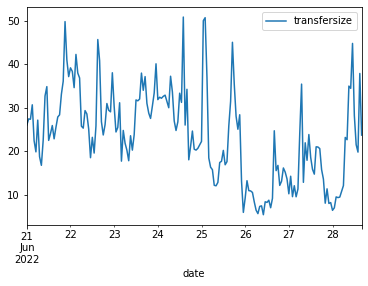

22/06/28 17:15:11 ERROR StandaloneSchedulerBackend: Application has been killed. Reason: Master removed our application: KILLED
22/06/28 17:15:11 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exiting due to error from cluster scheduler: Master removed our application: KILLED
	at org.apache.spark.errors.SparkCoreErrors$.clusterSchedulerError(SparkCoreErrors.scala:218)
	at org.apache.spark.scheduler.TaskSchedulerImpl.error(TaskSchedulerImpl.scala:923)
	at org.apache.spark.scheduler.cluster.StandaloneSchedulerBackend.dead(StandaloneSchedulerBackend.scala:154)
	at org.apache.spark.deploy.client.StandaloneAppClient$ClientEndpoint.markDead(StandaloneAppClient.scala:262)
	at org.apache.spark.deploy.client.StandaloneAppClient$ClientEndpoint$$anonfun$receive$1.applyOrElse(StandaloneAppClient.scala:169)
	at org.apache.spark.rpc.netty.Inbox.$anonfun$process$1(Inbox.scala:115)
	at org.apache.spark.rpc.netty.Inbox.safelyCall(Inbox.scala:213)
	at org.apache.spark.rpc.netty.Inbox.proce

In [19]:
pd4.plot(kind = 'line')

<AxesSubplot:xlabel='date'>

/tmp/ipykernel_160050/3553124308.py:2: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "fontsize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('daily_transfer_volume.png' ,fontsize=24)


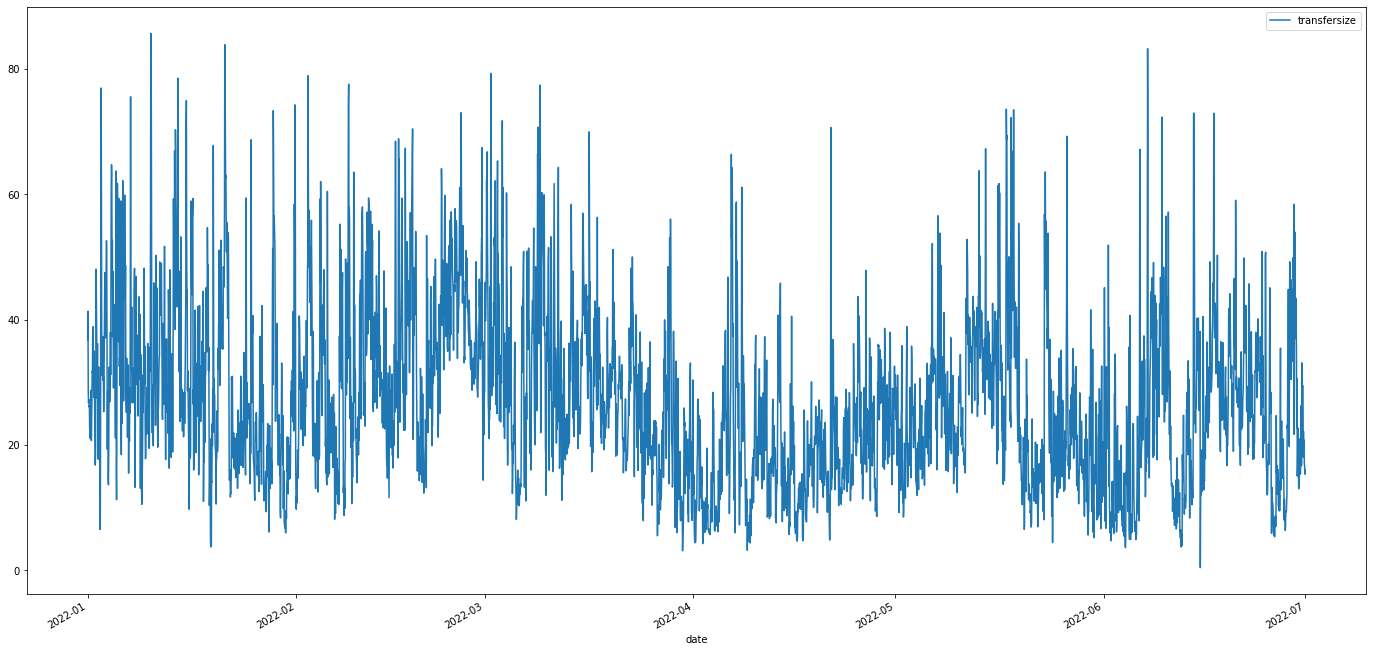

In [35]:
pd5.plot(figsize=(24,12))
plt.savefig('daily_transfer_volume.png' ,fontsize=24)

In [37]:
df_vo = spark.sql("SELECT vo ,COUNT(vo) AS number_of_restores FROM billing WHERE action='restore' and errorcode = 0 group by vo order by number_of_restores  desc ")
df_vo.show()

+---+------------------+
| vo|number_of_restores|
+---+------------------+
+---+------------------+



In [ ]:
write_per_restore = spark.sql("select DISTINCT(action) from billing where action='restore'")
write_per_restore.show()

In [ ]:
unioned_df = write_per_restore.join(df_vo)
unioned_df.show(100)

In [ ]:
d1=unioned_df.toPandas()
print(d1)

In [ ]:
d1=d1.sort_values(by=['number_of_restores'], ascending=False)

In [ ]:
d1.plot.bar(x='vo', y='number_of_restores' , color='blue',edgecolor = 'black', alpha=0.5 ,figsize=(24,12),align='center', width=-0.4)
plt.xlabel("vo")
plt.ylabel("number_of_restores_6_months" ,fontsize=24)
plt.savefig('name.png' ,fontsize=24)
plt.rcParams.update({'font.size': 14})
plt.xticks(rotation=90)
plt.show()